# Поиска инсайтов и точек роста «Всё.из.кафе»

Автор: Миронов В.А.

Дата: 05.07.2025


### Задачи 

- изучите пользовательский путь и проанализируете конверсии через воронки;
- сегментируете пользователей с помощью RFM-модели для оценки лояльности и поведения клиентов;
- кластеризуете рестораны методом K-Means, чтобы выделить группы с разными моделями работы и разработать персонализированные маркетинговые стратегии.

Такой подход позволит ближе познакомиться с работой сервиса, выявить узкие места и предложить решения для удержания пользователей и повышения эффективности сотрудничества с ресторанами.


### Данные

Данные включают следующие сведения:
      
- `visitor_uuid` — идентификатор посетителя. Это идентификатор, который присваивается системой любому новому пользователю вне зависимости от того, зарегистрировался он в продукте или нет.
- `user_id` — идентификатор зарегистрированного пользователя. Присваивается посетителю после создания учётной записи: ввода логина, пароля, адреса доставки и контактных данных.
- `device_type` — тип платформы, с которой посетитель зашёл в продукт.
- `city_id` — город, из которого посетитель зашёл в сервис.
- `source` — рекламный источник привлечения посетителя.
- `first_date` — дата первого посещения продукта.
- `visit_id` — уникальный идентификатор сессии.
- `event` — название аналитического события.
- `datetime` — дата и время события.
- `rest_id` — уникальный идентификатор ресторана (заполняется для заказов, карточек ресторанов и блюд).
- `object_id` — уникальный идентификатор блюда (заполняется для заказов и карточек блюд).
- `order_id` — уникальный идентификатор заказа.
- `revenue` — выручка от заказа (в рублях). Это та сумма, которую пользователь видит при оплате.
- `delivery` — стоимость доставки (в рублях).
- `commission` — комиссия, которую «Всё.из.кафе» берёт с выручки ресторана, в процентах.

    
### План проекта
- Загрузка данных и их предобработка.
- Анализ пользовательского пути новых пользователей.
- RFM сегментация.
- K-Means кластеризация.
- Итоговый вывод и рекомендации.

## 1. Загрузка данных и их предобработка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Загрузка данных
df = pd.read_csv('https://code.s3.yandex.net/datasets/insides_data.csv')

# Посмотрим первые строки
display(df.head())

# Общая информация
display(df.info())

# Размер таблицы
print(f'Количество строк: {df.shape[0]}, количество столбцов: {df.shape[1]}')

,visitor_uuid,user_id,device_type,city_id,source,first_date,visit_id,event,datetime,rest_id,object_id,order_id,revenue,delivery,commission
0,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,authorization,2021-05-01 16:07:53,NaN,NaN,NaN,NaN,NaN,NaN
1,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,reg_page,2021-05-01 16:09:16,NaN,NaN,NaN,NaN,NaN,NaN
2,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,confirm_phone,2021-05-01 16:09:19,NaN,NaN,NaN,NaN,NaN,NaN
3,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,login,2021-05-01 16:09:23,NaN,NaN,NaN,NaN,NaN,NaN
4,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:34,2c6095730b514c189ee41c65f03febc3,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205510 entries, 0 to 205509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   visitor_uuid  205510 non-null  object 
 1   user_id       205510 non-null  float64
 2   device_type   205510 non-null  object 
 3   city_id       205510 non-null  int64  
 4   source        205510 non-null  object 
 5   first_date    205510 non-null  object 
 6   visit_id      205510 non-null  int64  
 7   event         205510 non-null  object 
 8   datetime      205510 non-null  object 
 9   rest_id       166915 non-null  object 
 10  object_id     21308 non-null   float64
 11  order_id      7008 non-null    float64
 12  revenue       7008 non-null    float64
 13  delivery      7008 non-null    float64
 14  commission    21308 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 23.5+ MB


None

Количество строк: 205510, количество столбцов: 15


**Общая информация**
- В датасете — 205 510 строк, 15 столбцов.
- Дубликатов нет.
- Типы данных корректны, но даты нужно привести к datetime

In [3]:
# Пропуски
print(df.isnull().sum())

# Дубликаты
print(f'Дубликатов: {df.duplicated().sum()}')

visitor_uuid         0
user_id              0
device_type          0
city_id              0
source               0
first_date           0
visit_id             0
event                0
datetime             0
rest_id          38595
object_id       184202
order_id        198502
revenue         198502
delivery        198502
commission      184202
dtype: int64
Дубликатов: 0


**Пропуски**
- Поля rest_id отсутствуют у ~38 595 записей — это нормально, так как не каждое событие связано с рестораном.
- Поля object_id заполнены только у ~21 308 строк — значит, не каждое событие связано с блюдом.
- Поля order_id, revenue, delivery заполнены у ~7 008 строк — это логично, так как только заказы приносят выручку и доставку.
- Поле commission заполнено только для событий, связанных с ресторанами или заказами (21 308 строк).

In [4]:
# Даты и время
df['datetime'] = pd.to_datetime(df['datetime'])
df['first_date'] = pd.to_datetime(df['first_date'])

# Проверим числовые столбцы
print(df[['revenue', 'delivery', 'commission']].describe())

            revenue     delivery    commission
count   7008.000000  7008.000000  21308.000000
mean    2522.338903    24.539212      0.055926
std     2187.799948     8.652113      0.012107
min      235.200000     9.900000      0.040000
25%     1316.000000    17.000000      0.050000
50%     1944.600000    24.200000      0.050000
75%     3150.000000    32.100000      0.060000
max    42000.000000    39.900000      0.110000


**Типы данных**
- Поля first_date и datetime приведены к типу datetime.
- Остальные числовые поля в корректном формате.

In [5]:
# Отрицательные значения
print(df[df['revenue'] < 0])
print(df[df['delivery'] < 0])
print(df[df['commission'] < 0])

Empty DataFrame
Columns: [visitor_uuid, user_id, device_type, city_id, source, first_date, visit_id, event, datetime, rest_id, object_id, order_id, revenue, delivery, commission]
Index: []
Empty DataFrame
Columns: [visitor_uuid, user_id, device_type, city_id, source, first_date, visit_id, event, datetime, rest_id, object_id, order_id, revenue, delivery, commission]
Index: []
Empty DataFrame
Columns: [visitor_uuid, user_id, device_type, city_id, source, first_date, visit_id, event, datetime, rest_id, object_id, order_id, revenue, delivery, commission]
Index: []


**Странные значения**
- Отрицательных значений в revenue, delivery и commission — нет.
- Выручка и доставка имеют разумный диапазон (от ~235 ₽ до 42 000 ₽).
- Комиссия в пределах от 4% до 11% — тоже адекватно.

In [6]:
df = df.drop_duplicates()

# Проверка на неявные дубликаты по ключевым полям
duplicate_keys = df.duplicated(subset=['user_id', 'datetime', 'event']).sum()
print(f'Неявных дубликатов по [user_id, datetime, event]: {duplicate_keys}')

Неявных дубликатов по [user_id, datetime, event]: 7


In [7]:
df = df.drop_duplicates(subset=['user_id', 'datetime', 'event'])
print(f'Осталось строк после удаления неявных дубликатов: {df.shape[0]}')

Осталось строк после удаления неявных дубликатов: 205503


In [8]:
# Проверим количество уникальных пользователей и ресторанов
print(f'Уникальных пользователей: {df["user_id"].nunique()}')
print(f'Уникальных ресторанов: {df["rest_id"].nunique()}')

Уникальных пользователей: 8473
Уникальных ресторанов: 21


In [9]:
# Проверим период данных
print(f'Минимальная дата: {df["datetime"].min()}')
print(f'Максимальная дата: {df["datetime"].max()}')
print(f'Период данных: {(df["datetime"].max() - df["datetime"].min()).days} дней')

Минимальная дата: 2021-05-01 00:10:55
Максимальная дата: 2021-07-02 00:12:08
Период данных: 62 дней


**Итог:**

Данные загружены и готовы к дальнейшему анализу. Пропуски логичны и не требуют искусственного заполнения — будем учитывать их контекстно (например, фильтровать для расчёта выручки и заказов). Дубликатов нет. Странных значений не выявлено.

---

## 2. Анализ пользовательского пути

Маркетологи стали замечать следующее: деньги на рекламу по-прежнему тратятся, а заказов стало меньше. И это несмотря на то, что приложение скачивается и устанавливается так же активно, как раньше. Складывается ощущение, что пользователи где-то теряются. При этом доля заказов с десктопной версии приложения увеличилась по сравнению с мобильной.

Разработчики говорят, что последние обновления мобильной версии приложения не должны были повлиять на каталог блюд или его выбор для заказа и последующей оплаты доставки, так как изменения касались нового алгоритма подтверждения мобильного телефона и адреса доставки.

С помощью воронок изучите общий пользовательский путь новых пользователей, затем сравните поведение пользователей мобильной и десктопной версий приложения. 

In [10]:
steps = [
    'authorization',
    'main_page',
    'reg_page',
    'confirm_phone',
    'object_page',
    'add_to_cart',
    'order'
]

In [11]:
# Группируем по шагу
funnel = []

for step in steps:
    users = df[df['event'] == step]['visitor_uuid'].nunique()
    funnel.append(users)

print(funnel)

[7796, 6835, 5649, 4347, 3530, 2929, 2432]


In [12]:
funnel_df = pd.DataFrame({
    'step': steps,
    'users': funnel
})

# Классическая конверсия — от первого шага
funnel_df['classic_conv_%'] = funnel_df['users'] / funnel_df['users'][0] * 100

# Step-by-step конверсия
funnel_df['step_conv_%'] = funnel_df['users'].pct_change().fillna(0) + 1
funnel_df['step_conv_%'] = funnel_df['step_conv_%'] * 100
funnel_df.loc[0, 'step_conv_%'] = 100

display(funnel_df)

,step,users,classic_conv_%,step_conv_%
0,authorization,7796,100.000000,100.000000
1,main_page,6835,87.673166,87.673166
2,reg_page,5649,72.460236,82.648135
3,confirm_phone,4347,55.759364,76.951673
4,object_page,3530,45.279631,81.205429
5,add_to_cart,2929,37.570549,82.974504
6,order,2432,31.195485,83.031751


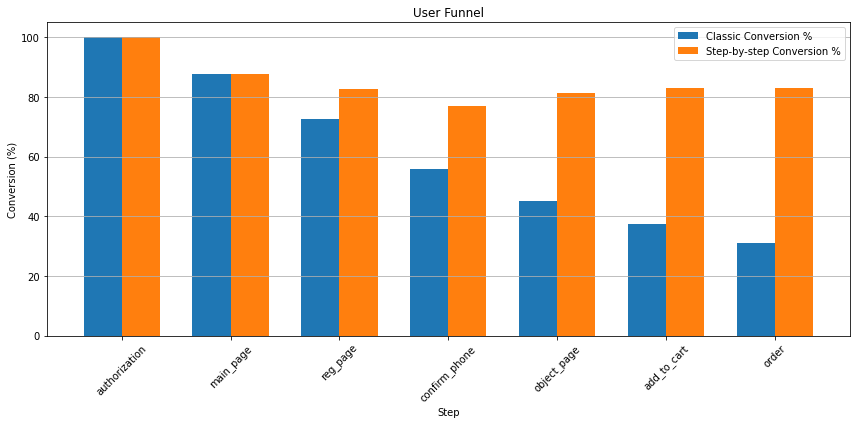

In [13]:
# Зададим ширину и позиции столбцов
x = np.arange(len(funnel_df['step']))
width = 0.35

plt.figure(figsize=(12, 6))

# Столбцы для classic_conv_%
plt.bar(x - width/2, funnel_df['classic_conv_%'], width, label='Classic Conversion %')

# Столбцы для step-by-step conv
plt.bar(x + width/2, funnel_df['step_conv_%'], width, label='Step-by-step Conversion %')

# Подписи и оформление
plt.xticks(x, funnel_df['step'], rotation=45)
plt.title('User Funnel')
plt.ylabel('Conversion (%)')
plt.xlabel('Step')
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

###### Описание пользовательского пути

**Этапы и их последовательность**

Путь нового пользователя в сервисе «Всё.из.кафе» включает 7 последовательных шагов:
1. authorization — запуск приложения / авторизация пользователя.
2. main_page — загрузка главной страницы приложения.
3. reg_page — переход на страницу регистрации.
4. confirm_phone — подтверждение телефона (окончание регистрации).
5. object_page — просмотр страницы с блюдом.
6. add_to_cart — добавление блюда в корзину.
7. order — оформление и оплата заказа.

**Как меняется количество пользователей**

|step            |	users |	classic_conv_% |	step_conv_% |
|----------------|--------|----------------|--------------- |
|authorization   |	7796  |	100.000000     |	100.000000  |
|main_page       |	6835  |	87.673166      |	87.673166   |
|reg_page        |	5649  |	72.460236      |	82.648135   |
|confirm_phone   |	4347  |	55.759364      |	76.951673   |
|object_page     |	3530  |	45.279631      |	81.205429   |
|add_to_cart     |	2929  |	37.570549      |	82.974504   |
|order           |	2432  |	31.195485      |	83.031751   |

**Где теряется большинство пользователей**

1️⃣ Самый большой отток — на этапе подтверждения телефона (confirm_phone):
- До этого шага доходят 72% пользователей, но после него остаётся только 55.8% от старта.
- Конверсия с reg_page на confirm_phone — ~77%.
- Это соответствует словам разработчиков: недавно меняли алгоритм подтверждения — вероятно, он стал сложнее или вызывает ошибки.

2️⃣ Второй значимый отток — переход от авторизации к главной странице (main_page):
- Теряется ~12% пользователей сразу после запуска приложения.
- Возможные причины: проблемы с загрузкой, баги, неудачный первый экран.

3️⃣ Последовательные оттоки на всех шагах после регистрации — умеренные, но стабильные:
- От object_page до order уходит ещё почти 15% от стартовой массы.
- Это нормальные «естественные» потери, но можно точечно улучшить UX корзины и выбор блюд.

4️⃣ Конверсия в целевое действие ~ 30%

**Ключевой инсайт**

Критическая точка — подтверждение телефона.
- Здесь сервис теряет почти 23% пользователей относительно начала регистрации.
- Если исправить UX или баги этого этапа, можно вернуть значительную часть пользователей и повысить конверсию в заказ.

In [14]:
# Два датафрейма по типу устройства
df_mobile = df[df['device_type'] == 'Mobile']
df_desktop = df[df['device_type'] == 'Desktop']

In [15]:
# Для Mobile
mobile_funnel = []
for step in steps:
    users = df_mobile[df_mobile['event'] == step]['visitor_uuid'].nunique()
    mobile_funnel.append(users)

# Для Desktop
desktop_funnel = []
for step in steps:
    users = df_desktop[df_desktop['event'] == step]['visitor_uuid'].nunique()
    desktop_funnel.append(users)

print('Mobile:', mobile_funnel)
print('Desktop:', desktop_funnel)

Mobile: [2858, 2372, 2103, 1150, 821, 712, 611]
Desktop: [4938, 4463, 3546, 3197, 2709, 2217, 1821]


In [16]:
funnel_df = pd.DataFrame({
    'step': steps,
    'mobile_users': mobile_funnel,
    'desktop_users': desktop_funnel
})

funnel_df['mobile_step_conv_%'] = funnel_df['mobile_users'].pct_change().fillna(0) + 1
funnel_df['mobile_step_conv_%'] = funnel_df['mobile_step_conv_%'] * 100
funnel_df.loc[0, 'mobile_step_conv_%'] = 100

funnel_df['desktop_step_conv_%'] = funnel_df['desktop_users'].pct_change().fillna(0) + 1
funnel_df['desktop_step_conv_%'] = funnel_df['desktop_step_conv_%'] * 100
funnel_df.loc[0, 'desktop_step_conv_%'] = 100

display(funnel_df)

,step,mobile_users,desktop_users,mobile_step_conv_%,desktop_step_conv_%
0,authorization,2858,4938,100.000000,100.000000
1,main_page,2372,4463,82.995101,90.380721
2,reg_page,2103,3546,88.659359,79.453283
3,confirm_phone,1150,3197,54.683785,90.157924
4,object_page,821,2709,71.391304,84.735690
5,add_to_cart,712,2217,86.723508,81.838317
6,order,611,1821,85.814607,82.138024


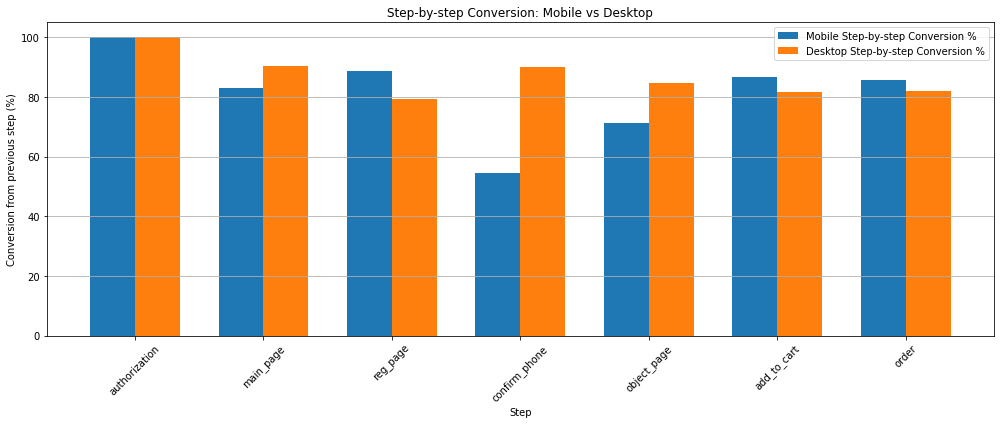

In [17]:
# # Зададим ширину и позиции столбцов
x = np.arange(len(funnel_df['step']))
width = 0.35

plt.figure(figsize=(14, 6))

# Столбцы для мобильной конверсии
plt.bar(x - width/2, funnel_df['mobile_step_conv_%'], width, label='Mobile Step-by-step Conversion %')

# Столбцы для десктопной конверсии
plt.bar(x + width/2, funnel_df['desktop_step_conv_%'], width, label='Desktop Step-by-step Conversion %')

# Подписи и оформление
plt.xticks(x, funnel_df['step'], rotation=45)
plt.title('Step-by-step Conversion: Mobile vs Desktop')
plt.xlabel('Step')
plt.ylabel('Conversion from previous step (%)')
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

**Сравнение пользовательского пути**

| Шаг                | Mobile Conv. % (step-by-step) | Desktop Conv. % (step-by-step) |
| ------------------ | ----------------------------- | ------------------------------ |
| authorization      | 100.0%                        | 100.0%                         |
| main_page          | 83.0%                         | 90.4%                          |
| reg_page           | 88.7%                         | 79.5%                          |
| confirm_phone      | 54.7%                         | 90.2%                          |
| object_page        | 71.4%                         | 84.7%                          |
| add_to_cart        | 86.7%                         | 81.8%                          |
| order              | 85.8%                         | 82.1%                          |

**Промежуточный вывод**

- В начале пути (от authorization до main_page) мобильная версия теряет чуть больше пользователей, чем десктопная (83% vs 90%).

- На этапе перехода к регистрации (main_page → reg_page) мобильная версия выглядит даже лучше — 88.7% против 79.5%.

- Ключевой разрыв — этап подтверждения телефона:

  - Mobile: всего 54.7% проходят шаг confirm_phone

  - Desktop: целых 90.2%

- После подтверждения телефона мобильная версия также немного уступает десктопу по переходам к просмотру блюда, но разрыв уже не такой критичный.

- На этапах add_to_cart и order конверсии снова выравниваются и даже немного выше у мобильной версии.

---

## 3. RFM сегментация

У сервиса доставки еды не такое высокое удержание пользователей: в первый день возвращается около 14% посетителей, а на седьмой день и того меньше — около 4–5%. Маркетологи хотят запустить несколько рекламных кампаний, направленных на удержание платящих пользователей и их возврат в сервис, если они давно не совершали заказы.

Для этого необходимо сегментировать пользователей на различные поведенческие сегменты с помощью RFM-сегментации по трём показателям: 
- **давность** (Recency), 
- **частота покупок** (Frequency), 
- **сумма трат** (Monetary).

В качестве даты анализа установите **03 июля 2021 года**.

In [18]:
# Фильтруем только события оформления заказа
orders = df[(df['event'] == 'order') & (df['order_id'].notna())].copy()

# Дата анализа
analysis_date = pd.to_datetime('2021-07-03')

# Убедимся, что datetime — это дата-время
orders['datetime'] = pd.to_datetime(orders['datetime'])

# Группируем по user_id и считаем R, F, M
rfm = orders.groupby('user_id').agg({
    'datetime': lambda x: (analysis_date - x.max()).days,  # Recency
    'order_id': 'count',                                   # Frequency
    'revenue': 'sum'                                       # Monetary
}).reset_index()

# Переименуем колонки
rfm.columns = ['user_id', 'Recency', 'Frequency', 'Monetary']

# Выводим базовые статистики
display(rfm.describe())

,user_id,Recency,Frequency,Monetary
count,2416.000000,2416.000000,2416.000000,2416.000000
mean,535932.551738,31.086093,1.468957,3720.171429
std,143745.266073,17.444239,0.950901,4036.352731
min,5506.000000,0.000000,1.000000,235.200000
25%,558738.250000,17.000000,1.000000,1512.000000
50%,591033.500000,29.000000,1.000000,2590.000000
75%,615221.000000,46.000000,2.000000,4443.117000
max,679837.000000,62.000000,12.000000,81690.000000


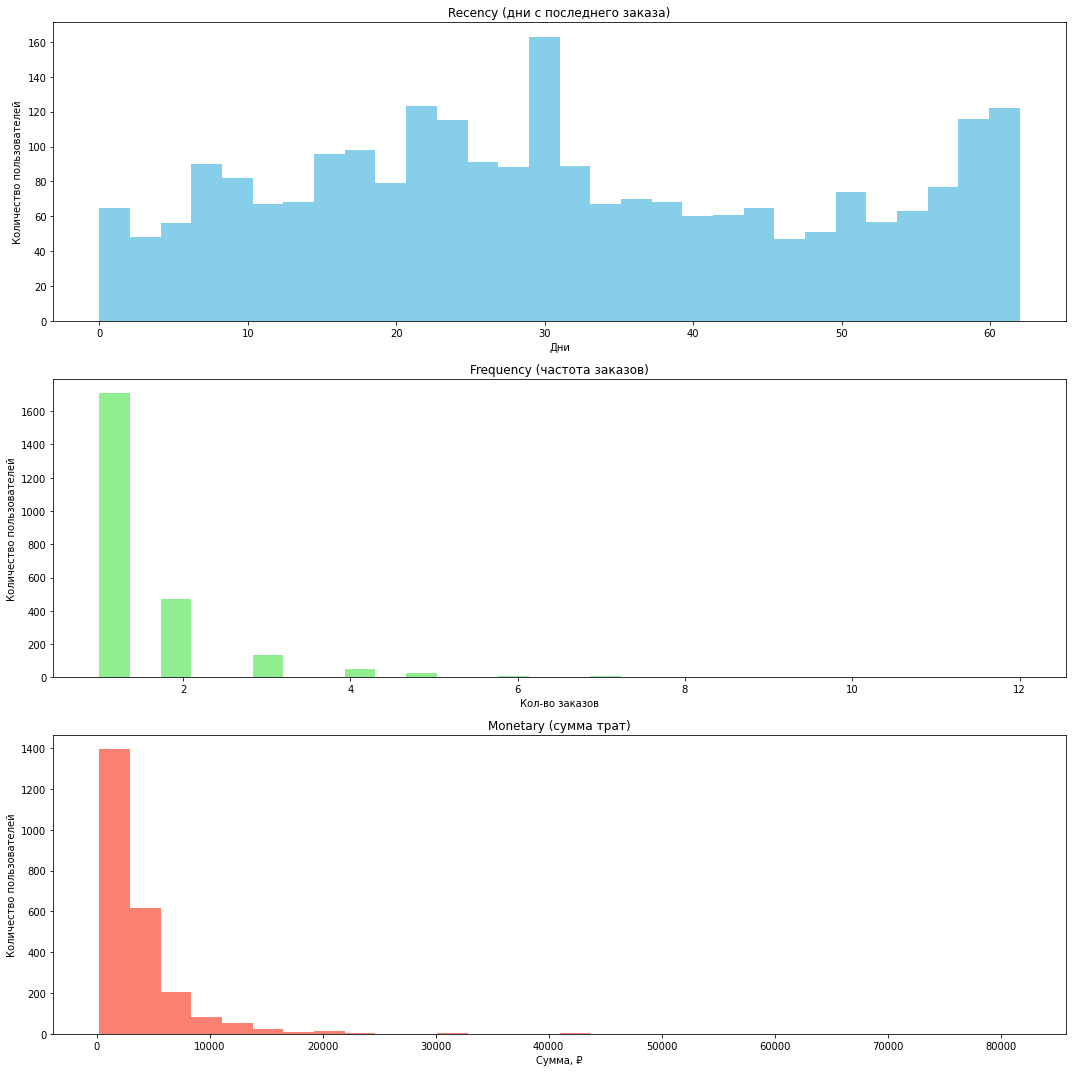

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

axs[0].hist(rfm['Recency'], bins=30, color='skyblue')
axs[0].set_title('Recency (дни с последнего заказа)')
axs[0].set_xlabel('Дни')
axs[0].set_ylabel('Количество пользователей')

axs[1].hist(rfm['Frequency'], bins=30, color='lightgreen')
axs[1].set_title('Frequency (частота заказов)')
axs[1].set_xlabel('Кол-во заказов')
axs[1].set_ylabel('Количество пользователей')

axs[2].hist(rfm['Monetary'], bins=30, color='salmon')
axs[2].set_title('Monetary (сумма трат)')
axs[2].set_xlabel('Сумма, ₽')
axs[2].set_ylabel('Количество пользователей')

plt.tight_layout()
plt.show()

**Recency (давность)**

- Распределение достаточно равномерное, но с яркими выбросами:
  - Пик на 0–5 дней — свежие пользователи, сделавшие заказ недавно.
  - Второй пик ближе к 60 дням — «спящие» клиенты, давно не возвращались.
- Это подтверждает проблему низкого удержания: много пользователей не возвращаются после первого заказа.
- Медианное значение — 29 дней, а четверть клиентов не покупали более 46 дней.

Нужно активнее работать над возвратом пользователей — запускать акции, пуши, персональные рекомендации.

**Frequency (частота заказов)**

- Более 65% клиентов сделали всего один заказ.
- Единицы совершают частые заказы (5+) — хвост распределения очень тонкий.
- Среднее значение — 1.47 заказа, медиана — 1.

Повторные заказы — основная точка роста. Необходимо внедрять механики вовлечения: бонусы за второй заказ, кэшбэк, «напоминаем о любимых блюдах».

**Monetary (сумма трат)**

- Распределение сильно скошено вправо:
  - Основная масса пользователей тратит до 4000 ₽.
  - Медиана — 2590 ₽.
  - Но есть небольшая группа с тратами в десятки тысяч рублей — максимум почти 82 000 ₽.
- Это VIP-пользователи, дающие значительную часть выручки.

Сервису важно удерживать крупных платящих клиентов — выделить их в отдельную группу, предложить персональные условия.

**Итог по гистограммам**

- Проблема с удержанием: большинство пользователей делают один заказ и уходят.

- Низкая частота заказов — требует работы над повторными продажами.

- Выручка сильно сосредоточена у небольшого числа VIP-клиентов — важна персонализация.

In [20]:
# Recency
recency_bins = 3 
rfm['R_segment'] = pd.cut(
    rfm['Recency'],
    bins=recency_bins,
    labels=['R3', 'R2', 'R1']
)

# Frequency
rfm['F_segment'] = np.where(rfm['Frequency'] == 1, 'F1',
                    np.where(rfm['Frequency'] == 2, 'F2', 'F3'))

# Monetary
rfm['M_segment'] = pd.qcut(rfm['Monetary'], 3, labels=['M1', 'M2', 'M3'])

# Проверка — выведем границы
print(rfm.groupby('R_segment')['Recency'].agg(['min', 'max', 'count']))
print(rfm.groupby('M_segment')['Monetary'].agg(['min', 'max', 'count']))

display(rfm.head())


           min  max  count
R_segment                 
R3           0   20    749
R2          21   41    934
R1          42   62    733
                min      max  count
M_segment                          
M1          235.200   1792.0    808
M2         1792.028   3640.0    813
M3         3654.000  81690.0    795


,user_id,Recency,Frequency,Monetary,R_segment,F_segment,M_segment
0,5506.0,32,2,3752.00,R2,F2,M3
1,6291.0,57,1,1750.00,R1,F1,M1
2,6820.0,41,1,1260.14,R2,F1,M1
3,11062.0,57,1,3785.60,R1,F1,M3
4,13254.0,54,1,553.00,R1,F1,M1


In [21]:
# Код ревьюера:
display(rfm.groupby('R_segment')['Recency'].max())

# Рассчитаем три равных интервала:
(rfm['Recency'].max() - rfm['Recency'].min())  / 3

R_segment
R3    20
R2    41
R1    62
Name: Recency, dtype: int64

20.666666666666668

In [22]:
# Считаем распределение
seg_counts = rfm.groupby(['R_segment', 'F_segment', 'M_segment'])['user_id'].count().reset_index()
seg_counts = seg_counts.rename(columns={'user_id': 'users_count'}).sort_values(by='users_count', ascending=False)

display(seg_counts)

,R_segment,F_segment,M_segment,users_count
9,R2,F1,M1,281
18,R1,F1,M1,247
0,R3,F1,M1,246
10,R2,F1,M2,237
19,R1,F1,M2,216
1,R3,F1,M2,186
11,R2,F1,M3,122
14,R2,F2,M3,115
17,R2,F3,M3,102
2,R3,F1,M3,99


**Что видно из таблицы:**

1️⃣ Основная масса — разовые и неактивные покупатели

Крупнейшие сегменты:

- R2-F1-M1 — 281
- R1-F1-M1 — 247
- R3-F1-M1 — 246

Это пользователи, которые давно или недавно совершили один заказ с низким чеком. Таких более 30% от всей базы. Это указывает на низкое удержание: люди пробуют сервис, но не возвращаются.

2️⃣ Ценные и лояльные сегменты — небольшие, но важные

Активные и прибыльные клиенты:

- R2-F3-M3 — 102
- R1-F3-M3 — 41
- R2-F2-M3 и R1-F2-M3 — по 115 и 85

Эти сегменты характеризуются высокой частотой заказов и высокими чеками. Это — основа выручки. Их важно удерживать и поощрять: персональные предложения, реферальные программы, премиальный сервис.

3️⃣ Потенциально ценные, но «уснувшие» пользователи

R3-F3-M3 — 68 пользователей

Пользователи из этого сегмента ранее были лояльными и щедрыми, но давно не возвращались. Их нужно реактивировать через специальные акции или push-кампании.

4️⃣ Повторные заказы с низким чеком

Например, R2-F3-M2, R1-F3-M2

Эти клиенты часто заказывают, но выбирают дешёвые позиции. Возможности: увеличить средний чек — кросс-продажи, комбо-наборы, доп. предложения.

**Ключевые выводы**

- Большинство пользователей совершают 1 заказ с небольшими тратами. Удержание и возврат — приоритет!

- Ценные сегменты (F3, M3) невелики, но дают наибольшую выручку. С ними нужно работать персонально.

- Лояльных, но "уснувших" клиентов можно вернуть прицельной реактивацией.

- Есть потенциал роста среднего чека за счёт работы с частыми, но экономными клиентами.

---

## 4. K-Means кластеризация

Чтобы лучше понимать поведение ресторанов и предлагать им персонализированные условия сотрудничества, а также создавать персонализированные предложения для пользователей, маркетологи запросили кластеризацию ресторанов по следующим параметрам:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

С помощью метода K-Means разделите рестораны на кластеры, отражающие различные модели работы и целевые сегменты. Это позволяет выделить группы ресторанов с похожими характеристиками и разрабатывать для них эффективные маркетинговые стратегии.

In [23]:
# Общее количество заказов по ресторану
orders_per_restaurant = (
    df[(df['order_id'].notna()) & (df['event'] == 'order')]
    .groupby('rest_id')['order_id']
    .nunique()
    .reset_index()
    .rename(columns={'order_id': 'total_orders'})
)

# Средняя стоимость заказа по ресторану
avg_order_value = (
    df[(df['order_id'].notna()) & (df['event'] == 'order')]
    .groupby('rest_id')['revenue']
    .mean()
    .reset_index()
    .rename(columns={'revenue': 'avg_order_value'})
)

# Количество уникальных блюд
unique_dishes = (
    df[(df['object_id'].notna()) & (df['event'] == 'order')]
    .groupby('rest_id')['object_id']
    .nunique()
    .reset_index()
    .rename(columns={'object_id': 'unique_dishes'})
)

# Объединяем всё в один датафрейм
restaurants = orders_per_restaurant.merge(
    avg_order_value, on='rest_id'
).merge(
    unique_dishes, on='rest_id'
)

display(restaurants.head())

,rest_id,total_orders,avg_order_value,unique_dishes
0,1be5a933aab34fbab594bebba48e976e,144,2260.180222,28
1,1d6bb74687104fa1953924c9684fe624,108,2959.256481,19
2,2c6095730b514c189ee41c65f03febc3,8,1673.000000,4
3,3247a3b5f9494812a3c1a73c5b61f004,33,2777.209697,4
4,39b7eab4f4704ed2886fafe171489960,33,2011.269697,5


**Что видно по показателям:**

- Общее количество заказов по ресторанам варьируется сильно — есть заведения с высоким спросом (например, 144 заказа), и есть те, у кого всего 8–33 заказов за период. Это показывает разный уровень популярности и степень активности партнёров на платформе.

- Средний чек сохраняет широкий разброс — от примерно 1 670 до почти 2 960. Это подтверждает, что среди партнёров есть как демократичные заведения с доступным средним заказом, так и более дорогие рестораны, ориентированные на заказы премиум-класса или большие заказы на компанию.

- Ассортимент (уникальные блюда) у большинства ресторанов довольно скромный — от 4 до 28 позиций. Это означает, что в выборке преобладают заведения с узкой или специализированной кухней. Широкий ассортимент встречается реже и часто сочетается с большим потоком заказов.

In [24]:
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(restaurants[['total_orders', 'avg_order_value', 'unique_dishes']])

# Поиск оптимального числа кластеров методом локтя
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

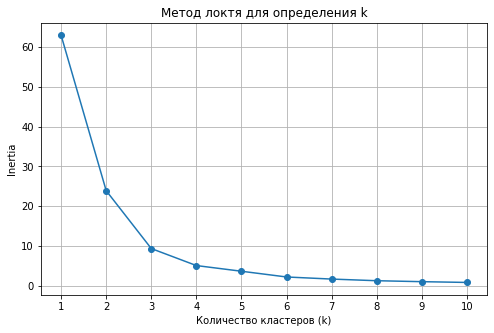

In [25]:
# Построение графика локтя
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Inertia')
plt.title('Метод локтя для определения k')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

На графике видно, что после точки k = 3 происходит заметное «замедление» снижения инерции — до 3 кластера инерция быстро падает, а потом замедляется и сглаживается.
Это значит, что оптимальное количество кластеров, скорее всего, k = 3 — именно на этом «локте» достигается баланс между качеством сегментации и её сложностью.

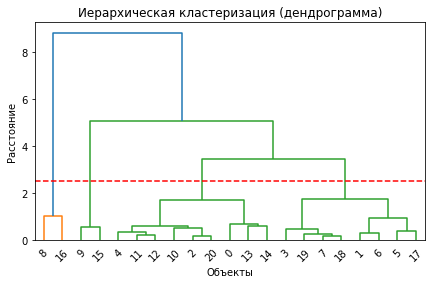

In [26]:
# Код ревьюера:
# Создадим таблицу связей:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_scaled, method = 'ward')

# Визуализируем таблицу связей:
plt.figure(figsize=(7, 4))  
dendrogram(linked, orientation='top')

plt.axhline(y=2.5, color='r', linestyle='--')  
plt.title("Иерархическая кластеризация (дендрограмма)")
plt.xlabel("Объекты")
plt.ylabel("Расстояние")

plt.show()

**Вывод:**
Для разбиения ресторанов на группы разумно выбрать 3 кластера — это позволит выявить разные типы заведений с похожими характеристиками и не усложнит сегментацию.

In [27]:
X = X_scaled

# Запускаем KMeans с выбранным числом кластеров
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Добавляем метки кластеров обратно в исходный DataFrame
restaurants['cluster'] = clusters

# Считаем средние значения по каждому кластеру (используем ненормализованные признаки!)
cluster_summary = restaurants.groupby('cluster').agg({
    'total_orders': 'mean',
    'avg_order_value': 'mean',
    'unique_dishes': 'mean',
    'cluster': 'count'
}).rename(columns={'cluster': 'count'}).reset_index()

display(cluster_summary)

,cluster,total_orders,avg_order_value,unique_dishes,count
0,0,69.60,2167.856491,9,15
1,1,1100.00,2498.828802,83,2
2,2,76.25,4048.497783,5,4


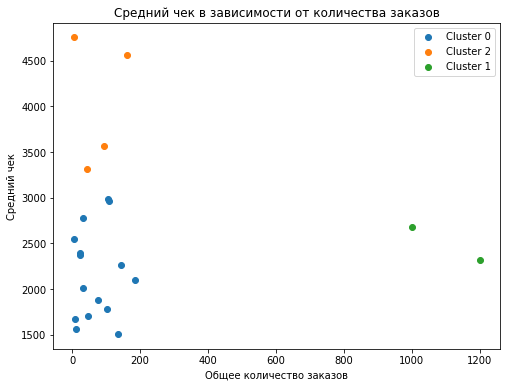

In [28]:
# Средний чек в зависимости от количества заказов
plt.figure(figsize=(8,6))
for cluster in restaurants['cluster'].unique():
    cluster_data = restaurants[restaurants['cluster'] == cluster]
    plt.scatter(cluster_data['total_orders'], cluster_data['avg_order_value'], label=f'Cluster {cluster}')
plt.xlabel('Общее количество заказов')
plt.ylabel('Средний чек')
plt.title('Средний чек в зависимости от количества заказов')
plt.legend()
plt.show()

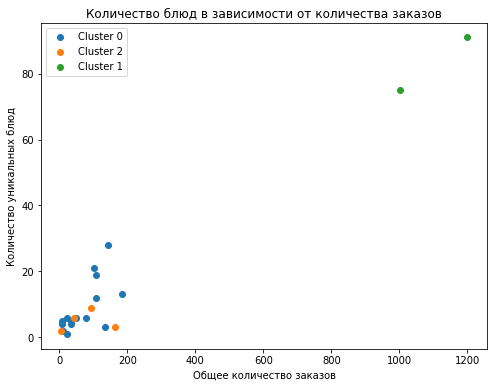

In [29]:
# Количество блюд в зависимости от количества заказов
plt.figure(figsize=(8,6))
for cluster in restaurants['cluster'].unique():
    cluster_data = restaurants[restaurants['cluster'] == cluster]
    plt.scatter(cluster_data['total_orders'], cluster_data['unique_dishes'], label=f'Cluster {cluster}')
plt.xlabel('Общее количество заказов')
plt.ylabel('Количество уникальных блюд')
plt.title('Количество блюд в зависимости от количества заказов')
plt.legend()
plt.show()

**Кластер 0 — Малые/новые партнёры**

- Среднее количество заказов: 69.6
- Средний чек: 2168 ₽
- Ассортимент: 9 уникальных блюд
- Количество объектов: 15

Это наиболее массовый кластер по числу заведений, но с низким числом заказов и ограниченным меню. Вероятно, это новые партнёры или небольшие локальные кафе. Для «Всё.из.кафе» это зона роста: важно улучшать их видимость в приложении, предлагать поддержку по упаковке, меню и визуалу. Возможны спецподборки (“локальные кафе”, “новички”), акции и обучение.

**Кластер 1 — Топ-заведения**

- Среднее количество заказов: 1100
- Средний чек: 2499 ₽
- Ассортимент: 83 уникальных блюда
- Количество объектов: 2

Эти рестораны — ядро платформы: они сочетают высокий спрос, широкий ассортимент и оптимальный чек. Скорее всего, это крупные и узнаваемые бренды или сетевые заведения. Их важно удерживать, развивать и поддерживать — предлагать аналитику, приоритет в выдаче, продвигать через подборки и баннеры.

**Кластер 2 — Премиум-партнёры**

- Среднее количество заказов: 76.25
- Средний чек: 4048 ₽
- Ассортимент: всего 5 уникальных блюд
- Количество объектов: 4

Рестораны с самым высоким средним чеком и небольшим меню. Это, вероятно, нишевые заведения с авторской кухней, делающие ставку на эксклюзивность и высокую маржу. Для «Всё.из.кафе» они важны как часть премиального позиционирования. Им может быть интересна таргетированная аудитория, спецпромо и продвижение среди VIP-пользователей.

---

## 5. Итоговый вывод и рекомендации

###### Итоговый вывод и рекомендации для сервиса доставки «Всё.из.кафе»

**Проблемы удержания и низкой активности пользователей**

- Более 65% клиентов совершают только один заказ, и большинство из них с низким чеком — это основной вызов.
- Медианная давность последнего заказа — 29 дней, а четверть клиентов не возвращались более 46 дней.

Вывод: нужно работать над возвратом пользователей — персонализированные пуши, бонусы за повторные заказы, реанимационные акции.

**Ключевые RFM-сегменты**

- Более 30% базы — разовые и неактивные клиенты (R1–3, F1, M1): низкая лояльность, пробуют и уходят.

- VIP-клиенты (R1–2, F3, M3) — менее 10%, но приносят львиную долю выручки. Их нужно удерживать через премиальный сервис, персональные предложения и особое внимание.

- “Спящие” VIP-клиенты (R3, F3, M3) — ценные пользователи, которых можно вернуть акциями или персональными напоминаниями.

- Часто заказывающие, но экономные (F3, M1–2) — хороший потенциал для роста среднего чека через комбо-наборы и апсейл.

**Воронка регистрации: критические точки оттока**

- Главная проблема — подтверждение телефона в мобильной версии (54.7% конверсии vs 90.2% в десктопе). Здесь теряется почти половина пользователей после регистрации. Требуется упрощение или улучшение UX этого этапа.

- Также есть отток при загрузке главной страницы (−12%), возможно из-за багов или неудачного экрана.

- Финальная конверсия в заказ ~ 30%. Это хороший базис, который можно улучшить через оптимизацию UX корзины и рекомендаций.

**Рестораны и партнёры: неравномерная активность**

- Кластер 0 — малые/новые партнёры (основная масса): мало заказов, узкое меню. Требуют продвижения, витрин и обучающих инициатив.

- Кластер 1 — топ-заведения: высокая популярность, широкий ассортимент, оптимальный чек. Их нужно удерживать через аналитику, видимость и поддержку.

- Кластер 2 — премиум-партнёры: дорогие заказы и узкое меню. Важно таргетировать на них VIP-клиентов и развивать имидж.

**Ключевые инсайты для роста**

- Удержание важнее привлечения.

Сейчас большая часть пользователей делает только один заказ. Повторные заказы и возвращение клиентов — главный источник роста без дополнительных затрат на рекламу.

- VIP-сегменты — опора выручки.

Небольшая группа лояльных и платежеспособных клиентов обеспечивает значительную часть дохода. Их важно удерживать: персональные предложения, приоритетная поддержка, закрытые акции.

- Критические точки оттока = точки роста.

Улучшение UX мобильной регистрации (шаг подтверждения телефона) и оптимизация первого экрана — потенциально дадут +10–20% к конверсии в заказ.

- Партнёрская стратегия влияет на продукт.

Развитие малых и новых кафе (кластер 0) — источник расширения ассортимента и локального охвата. При этом важно удерживать флагманов (кластер 1) и продвигать премиум (кластер 2) для роста среднего чека.